In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% ! important; }<style>"))

/var/folders/ns/3wxdg4g57h77vxwmr4wzmvt40000gn/T/ipykernel_5272/2354669594.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
from matplotlib.transforms import ScaledTranslation
import matplotlib.font_manager as fm
import pandas as pd
from mplsoccer import FontManager
from adjustText import adjust_text

import math
from PIL import Image
import urllib
import os

In [3]:
import socceraction
from socceraction.data.opta import OptaLoader
import socceraction.spadl as spadl

In [4]:
fe = fm.FontEntry(
    fname='/Users/davidegualano/Documents/Python FTBLData/SourceSansPro-Regular.ttf',
    name='SourceSansPro-Regular'
)
fm.fontManager.ttflist.insert(0, fe)
matplotlib.rcParams['font.family'] = fe.name

In [5]:
xP = pd.read_csv("xPactions.csv", index_col = 0)

teams0 = pd.read_csv("teams2021.csv", index_col = 0)
teams1 = pd.read_csv("teams2122.csv", index_col = 0)
teams2 = pd.read_csv("teams2223.csv", index_col = 0)
teams3 = pd.read_csv("teams2324.csv", index_col = 0)

players0 = pd.read_csv("players2021.csv", index_col = 0)
players1 = pd.read_csv("players2122.csv", index_col = 0)
players2 = pd.read_csv("players2223.csv", index_col = 0)
players3 = pd.read_csv("players2324.csv", index_col = 0)

games0 = pd.read_csv("games2021.csv", index_col = 0)
games1 = pd.read_csv("games2122.csv", index_col = 0)
games2 = pd.read_csv("games2223.csv", index_col = 0)
games3 = pd.read_csv("games2324.csv", index_col = 0)

actions0 = pd.read_csv("actions2021.csv", index_col = 0)
actions1 = pd.read_csv("actions2122.csv", index_col = 0)
actions2 = pd.read_csv("actions2223.csv", index_col = 0)
actions3 = pd.read_csv("actions2324.csv", index_col = 0)

In [6]:
teams = pd.concat([teams0, teams1, teams2, teams3])
players = pd.concat([players0, players1, players2, players3])
games = pd.concat([games0, games1, games2, games3])
actions = pd.concat([actions0, actions1, actions2, actions3])

In [7]:
teams = teams.drop_duplicates()

In [8]:
actions.drop(columns=['action_id'], inplace=True)
actions.reset_index(drop=True, inplace=True)
actions.reset_index(inplace=True)
actions.rename(columns={'index': 'action_id'}, inplace=True)

In [9]:
df = (
    actions
    .merge(spadl.actiontypes_df(), how="left")
    .merge(spadl.bodyparts_df(), how="left")
    .merge(spadl.results_df(), how="left")
    .merge(players, how="left")
    .merge(teams, how="left")
    .merge(xP, how="left"))

In [10]:
df1 = df[df["type_name"] == 'pass']
df1['outcome'] = np.where((df1["result_name"] == 'success'), True, False)
df1['PAx'] = df1['outcome'] - df1['xP']

X0 = (df1.groupby(["player_name", "team_name", "competition_id", "season_id"], observed = True)["xP"].sum().reset_index())

Y0 = (df1.groupby(["player_name", "team_name", "competition_id", "season_id"], observed = True)["type_name"].count().reset_index())
Y0.rename(columns = {'type_name':'attempted_passes'}, inplace = True)

Time = (df1.groupby(["player_name", "team_name", "competition_id", "season_id", "game_id", "starting_position"], observed = True)["minutes_played"].mean().reset_index())
T = Time[Time["starting_position"] != 'Sub']
T = T.drop_duplicates(subset=['player_name', 'team_name', "competition_id", "season_id"])
Z1 = (Time.groupby(["player_name", "team_name", "competition_id", "season_id"], observed = True)["minutes_played"].sum().reset_index())
Z2 = (T.groupby(["player_name", "team_name", "competition_id", "season_id", "starting_position"], observed = True)["minutes_played"].sum().reset_index())
Z2 = Z2.filter(items=["player_name", "team_name", "competition_id", "season_id", "starting_position"])
Z0 = (Z1.merge(Z2, how="left"))

df2 = df1[df1["result_name"] == 'success']
K0 = (df2.groupby(["player_name", "team_name", "competition_id", "season_id"], observed = True)["type_name"].count().reset_index())
K0.rename(columns = {'type_name':'successful_passes'}, inplace = True)

J0 = (df1.groupby(["player_name", "team_name", "competition_id", "season_id"], observed = True)["PAx"].sum().reset_index())

/var/folders/ns/3wxdg4g57h77vxwmr4wzmvt40000gn/T/ipykernel_5272/1287687810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'] = np.where((df1["result_name"] == 'success'), True, False)
/var/folders/ns/3wxdg4g57h77vxwmr4wzmvt40000gn/T/ipykernel_5272/1287687810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PAx'] = df1['outcome'] - df1['xP']


In [11]:
W0 = (Z0
    .merge(X0, how="left")
    .merge(Y0, how="left")
    .merge(K0, how="left")
    .merge(J0, how="left"))

In [12]:
W0['xP%'] = (W0['xP'] / W0['attempted_passes']) * 100
W0['Passes %'] = (W0['successful_passes'] / W0['attempted_passes']) * 100
W0['PAx100'] = ((W0['PAx']*100)/W0['attempted_passes']).round(2)

In [13]:
W0.starting_position.unique()

array(['DC', 'DR', 'FW', nan, 'AML', 'GK', 'AMC', 'AMR', 'DL', 'MR', 'MC',
       'DMR', 'ML', 'DML', 'DMC', 'FWL', 'FWR'], dtype=object)

In [ ]:
U0 = W0[~W0['competition_id'].isin(['ARG-Liga Profesional', 'BRA-Brasileirão', 'ENG-League One', 'ENG-Championship', 'EU-Champions League',
                                    'EU-Europa League', 'RUS-Premier League', 'SCO-Premiership', 'USA-Major League Soccer'])]
U0 = W0[W0['competition_id'] == 'ITA-Serie A']

In [14]:
U0 = W0[W0['competition_id'] == 'FRA-Ligue 1']
U1 = U0[U0['season_id'] == 2324.0]
U2 = U1[U1['minutes_played'] >= 1200]
U3 = U2[U2['starting_position'] == 'DC']

In [21]:
U3.to_csv("PAX-A.csv")

In [24]:
U4 = U3.sort_values(by = ["PAx100"], ascending = False).reset_index(drop = True).head(10)
U5 = U4.filter(items=['player_name', 'team_name', 'PAx100']).sort_values(by = ["PAx100"], ascending = True).reset_index(drop = True)
U5

,player_name,team_name,PAx100
0,Jeanuël Belocian,Rennes,6.98
1,Warmed Omari,Rennes,7.04
2,Nathaniel Adjei,Lorient,7.07
3,Pablo Rosario,Nice,7.42
4,Leny Yoro,Lille,7.61
5,Isaak Touré,Lorient,8.19
6,Danilo Pereira,PSG,8.53
7,Marquinhos,PSG,8.85
8,Milan Skriniar,PSG,9.34
9,Bafodé Diakité,Lille,9.66


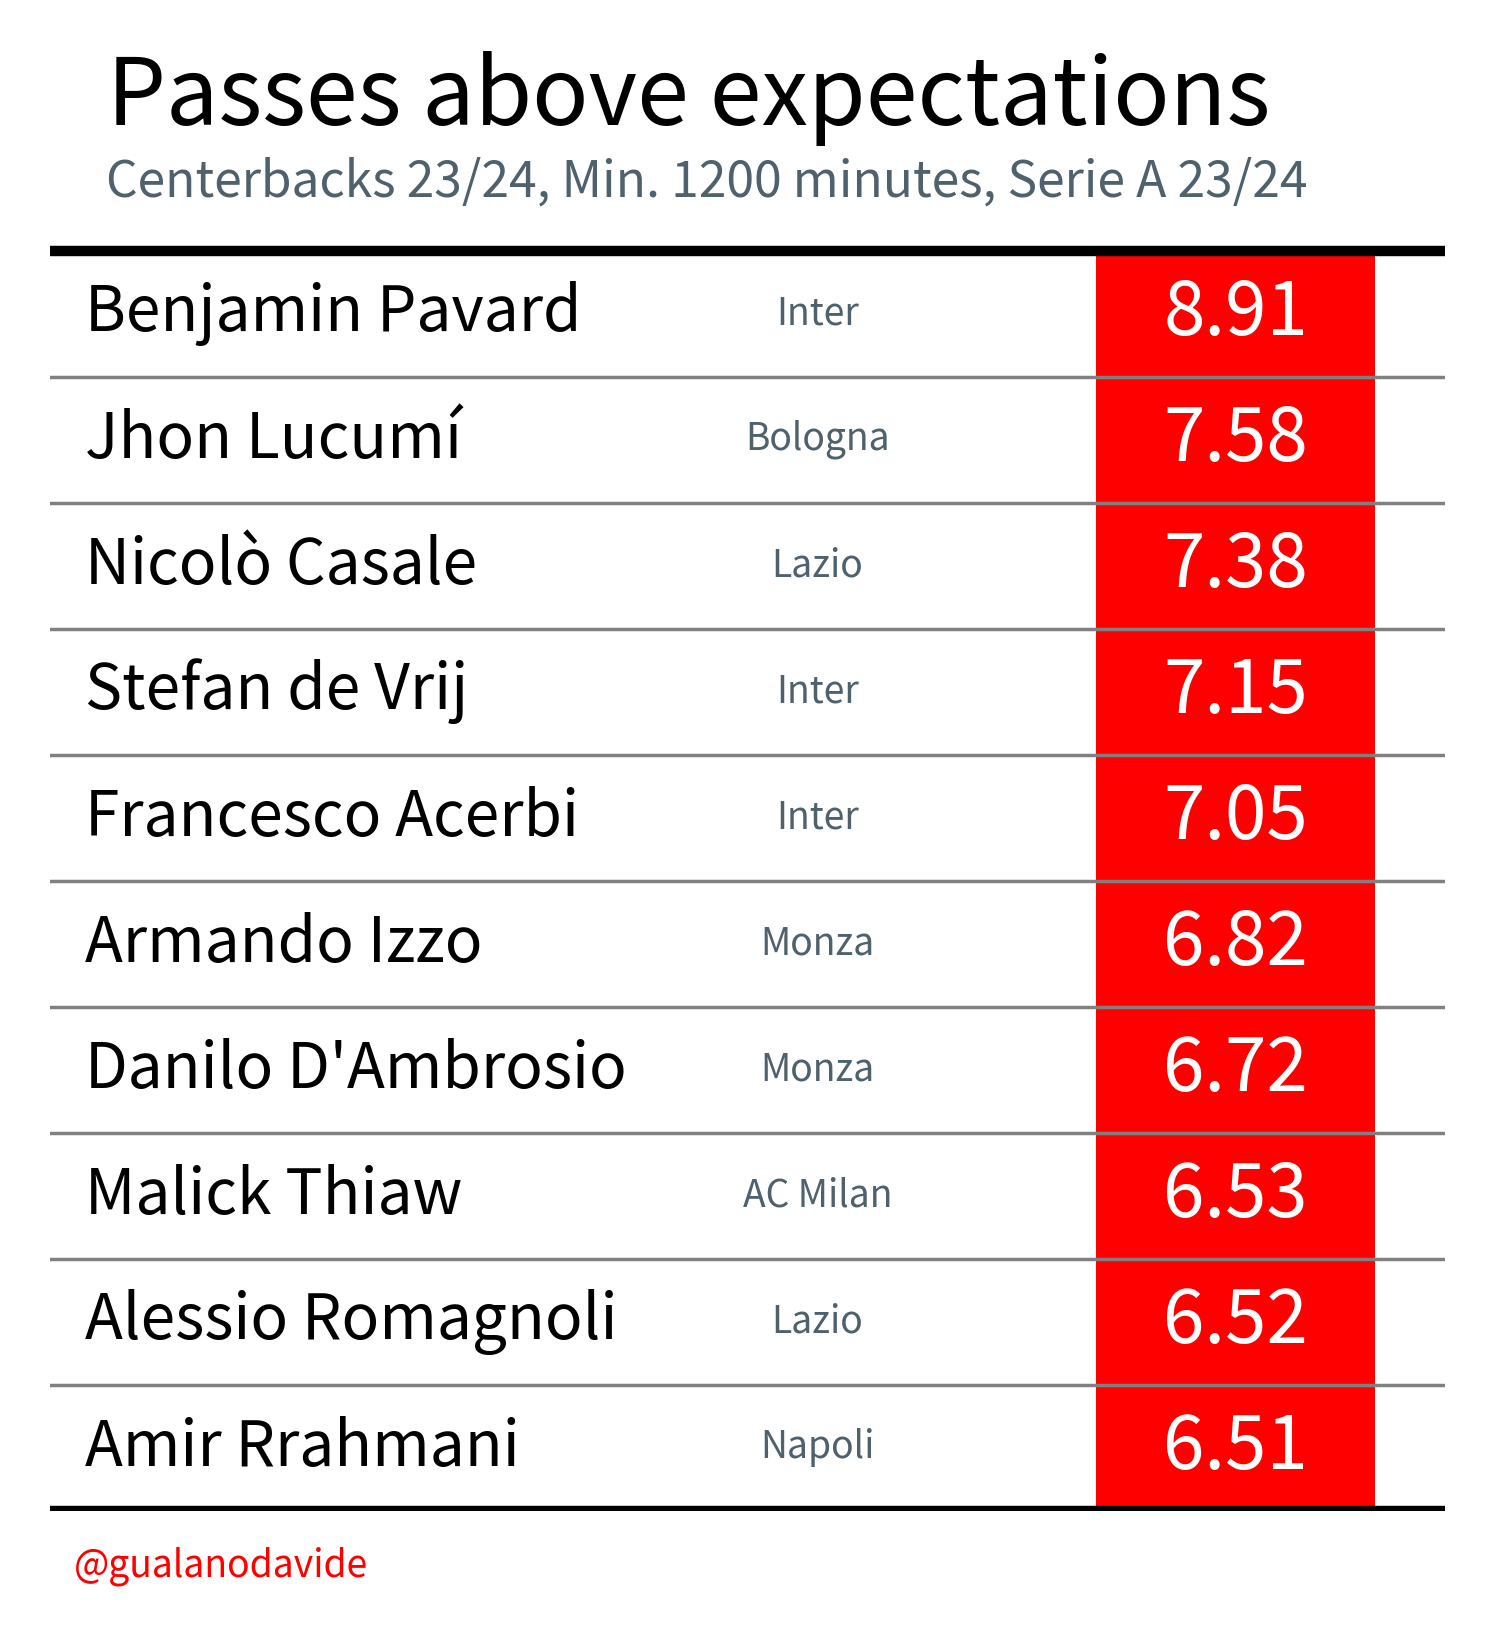

In [23]:
fig = plt.figure(figsize=(1800/500, 1800/500), dpi=500)
ax = plt.subplot()

ncols = U5.shape[1]
nrows = U5.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.1, 2.2, 3.4]
columns = ['player_name', 'team_name', 'PAx100']

for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        # Check if the current column is 'PAx100'
        if column == 'PAx100':
            fontsize = 12
            color = '#FFFFFF'
        elif column == 'team_name':
            fontsize = 6  # Default fontsize for other columns
            color = '#4E616C'  # Default color for other columns
        else:
            fontsize = 10  # Default fontsize for other columns
            color = '#000000'  # Default color for other columns
        ax.annotate(
            xy=(positions[j], i + .5), text=str(U5[column].iloc[i]), ha=ha, va='center', fontsize=fontsize, color=color)

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=0.5, color='gray', ls='-', zorder=3 , marker='')
    
    ax.fill_between(x=[3, 3.8], y1=nrows, y2=0, color='red', alpha=0.5, ec='None')

plt.text(0.48, 0.88, f'Passes above expectations', transform=fig.transFigure, horizontalalignment='center', fontsize = 15)
plt.text(0.49, 0.84, f'Centerbacks 23/24, Min. 1200 minutes, Serie A 23/24', transform=fig.transFigure, horizontalalignment='center',
         fontsize = 8, color = '#4E616C')
fig.suptitle(f'Twitter : @gualanodavide | Bluesky : @gualanodavide.bsky.social', x = 0.22, y = 0.09, fontsize=6, color = "red")


ax.set_axis_off()
plt.savefig(f'PAx100.png', dpi=500, facecolor = "#D7D1CF", bbox_inches = "tight", transparent = True)

Text(0.5, 0.5, 'It did!')

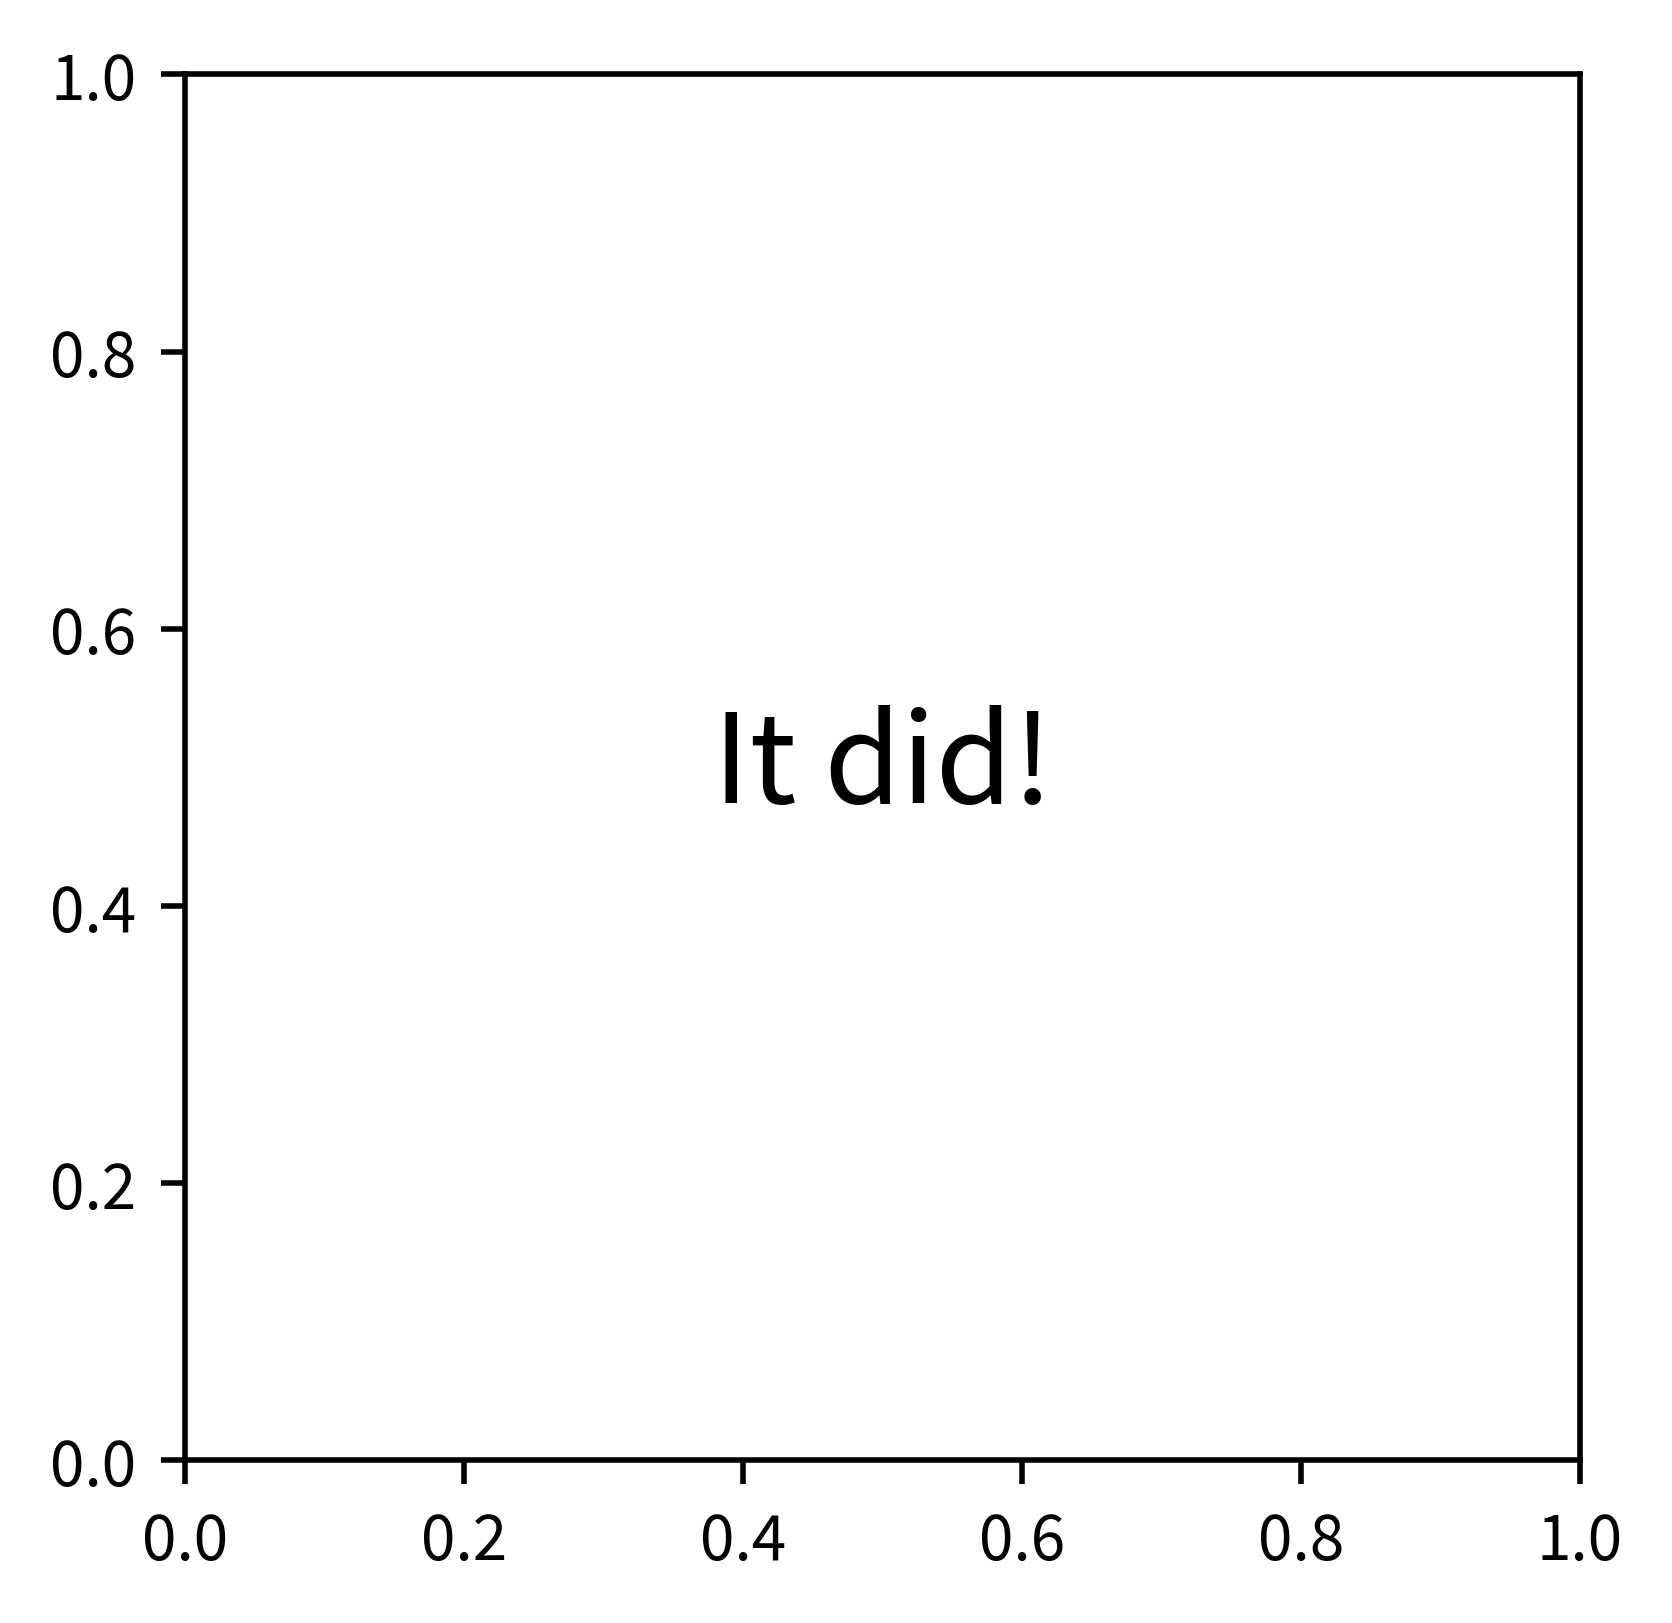

In [55]:
fig = plt.figure(figsize=(1800/500, 1800/500), dpi=500)
ax = plt.subplot(111)

ax.text(x = 0.5, y = 0.5, s = "It did!", size = 20, ha = "center", va = "center")

In [56]:
Y = U3['Passes %'] 
X = U3['xP%']

Y1 = U4['Passes %'] 
X1 = U4['xP%']

limY = U3['Passes %']  
limX = U3['xP%']

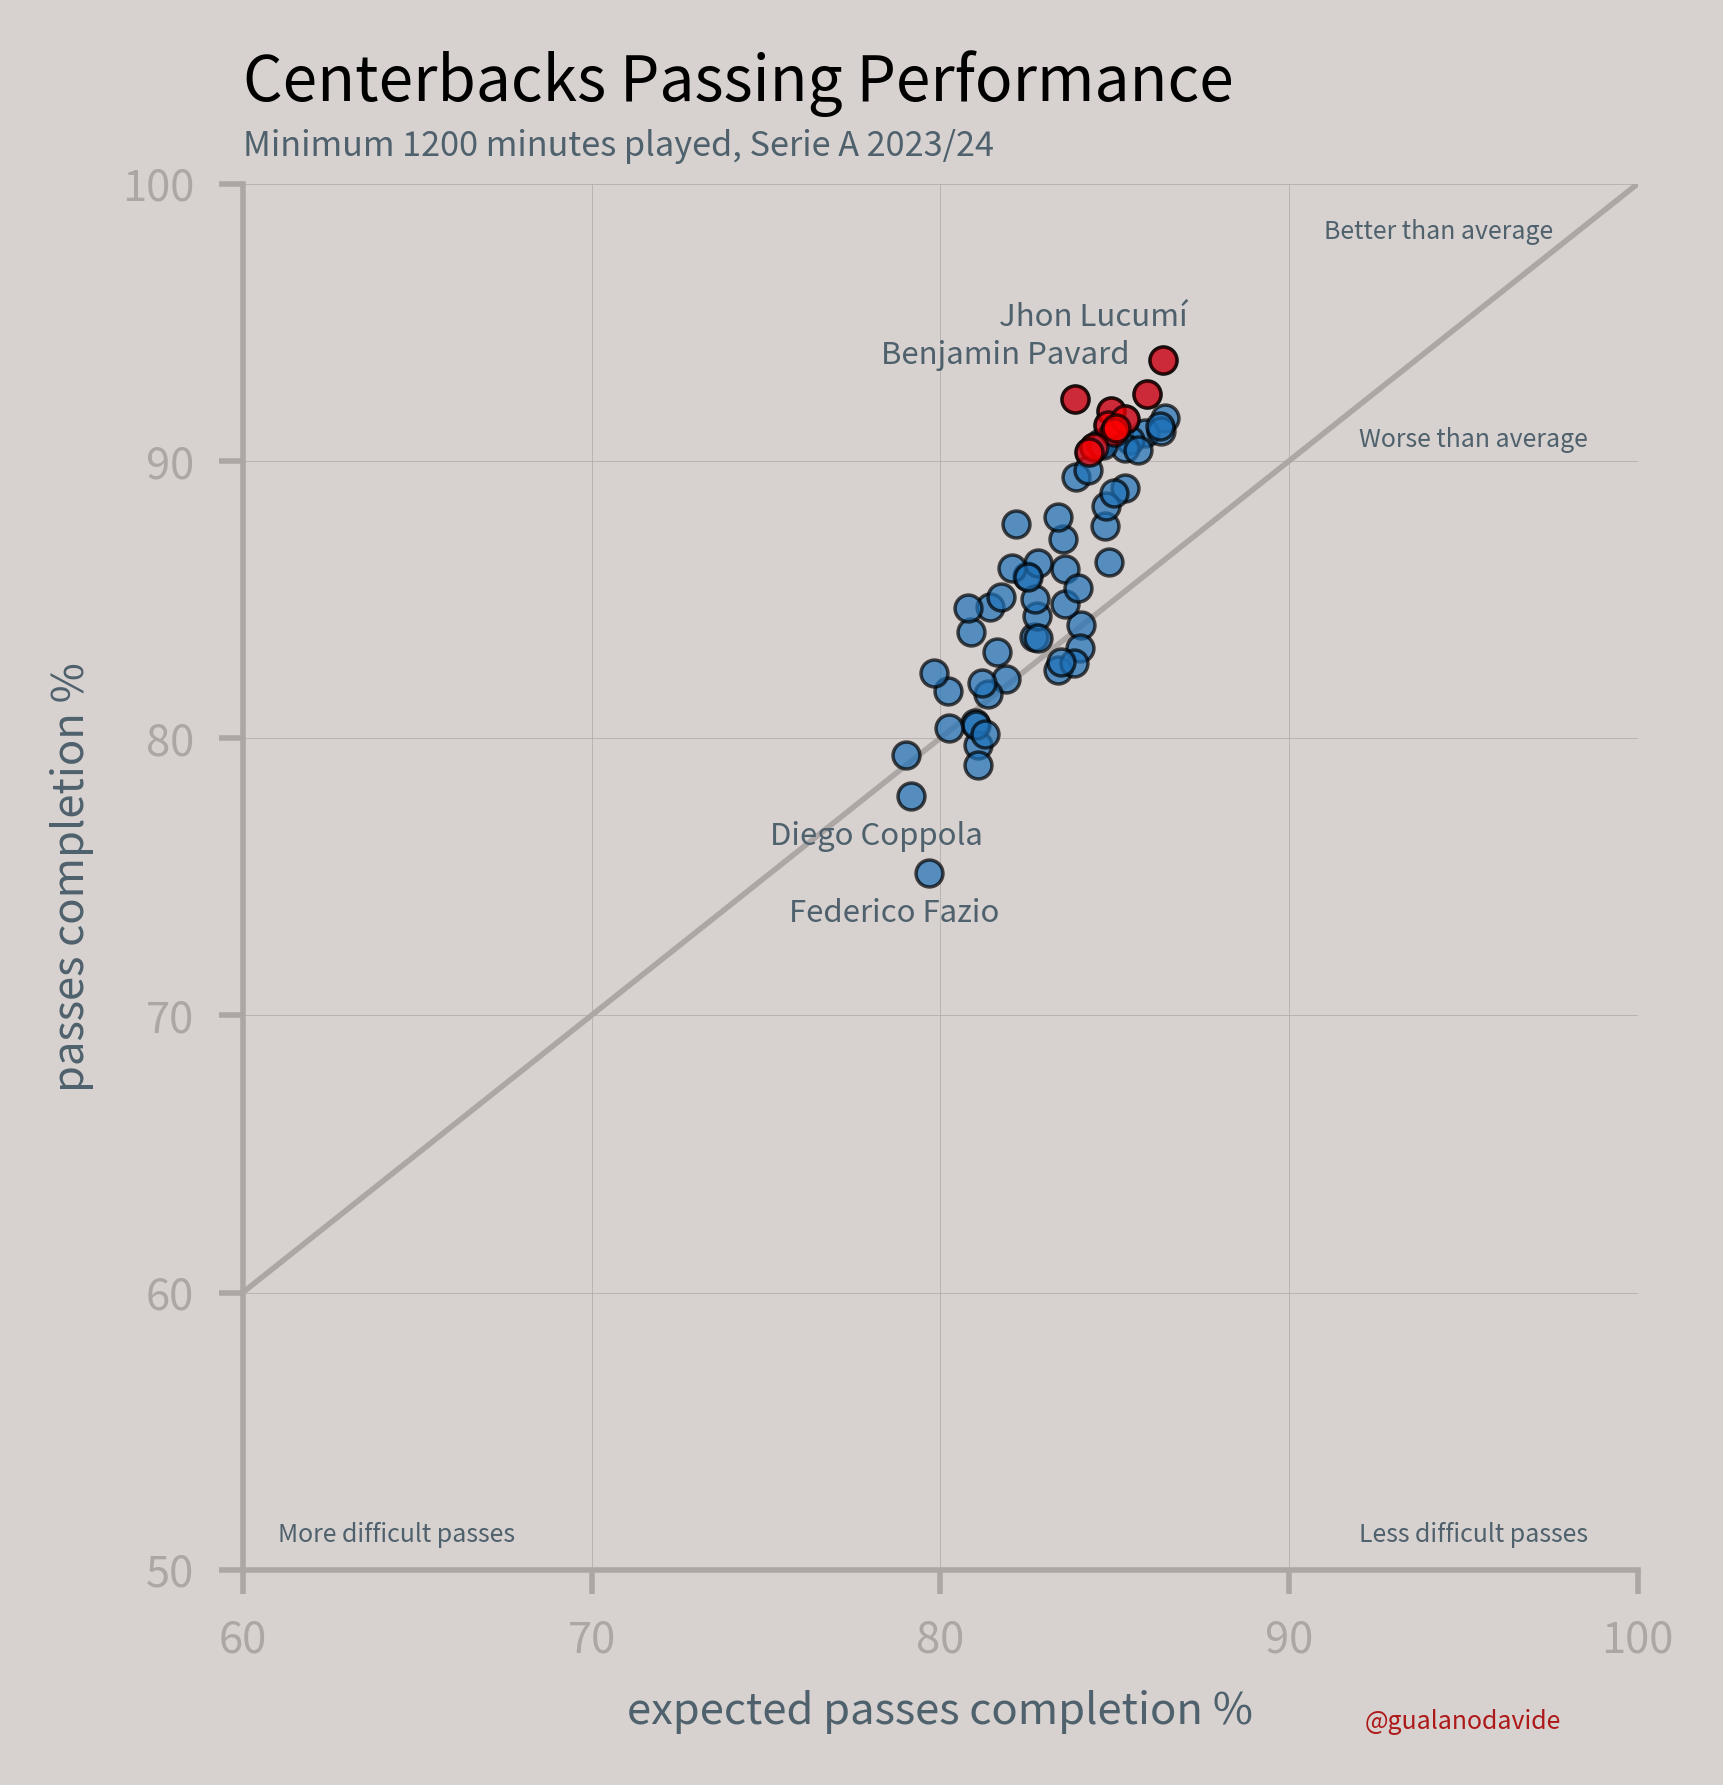

In [88]:
fig = plt.figure(figsize=(1800/500, 1800/500), dpi=500, facecolor = '#D7D1CF')
ax = plt.subplot(111, facecolor = '#D7D1CF')

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)
ax.spines["bottom"].set_color('#ACA7A5')
ax.spines["left"].set_color('#ACA7A5')

ax.grid(lw = 0.1, color = "#ACA7A5", axis = 'x', ls = "-")
ax.grid(lw = 0.1, color = "#ACA7A5", axis = 'y', ls = "-")

# Limit now depends on all of the league's matches
limit_ = math.ceil(max(limX.max(), limY.max()))

ax.set_ylim(50, 100)
ax.set_xlim(60, 100)

ax.scatter(
    X, 
    Y, 
    zorder = 3, 
    s = 15, 
    fc = '#1E71B8', # The background color
    ec = "#000000", # The edge color
    alpha = 0.70, # Transparency (from zero to 1)
    lw = 0.5)

ax.scatter(
    X1, 
    Y1, 
    zorder = 3, 
    s = 15, 
    fc = 'red', # The background color
    ec = "#000000", # The edge color
    alpha = 0.70, # Transparency (from zero to 1)
    lw = 0.5)

annotated_outliers = 0
for i, (x, y) in enumerate(zip(X, Y)):
    if y > 92 and annotated_outliers < 2:
        player_name = U3["player_name"].iloc[i]
        ax.annotate(player_name, (x, y), textcoords="offset points", xytext=(-10,5), ha='center', color='#4E616C', fontsize=5)
        annotated_outliers += 1
        
annotated_outliers = 0
for i, (x, y) in enumerate(zip(X, Y)):
    if x < 80 and y < 78:
        player_name = U3["player_name"].iloc[i]
        ax.annotate(player_name, (x, y), textcoords="offset points", xytext=(-5,-7), ha='center', color='#4E616C', fontsize=5)
        annotated_outliers += 1

# We set the major tick positions every integer.
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Notice the consistency in font size between the legend & ticks.
ax.tick_params(axis = 'both', labelsize = 7, color = '#ACA7A5', labelcolor = '#ACA7A5')

# Add axes legends
ax.yaxis.set_label_text("passes completion %", size = 7, color = "#4E616C")
ax.xaxis.set_label_text("expected passes completion %", size = 7, color = "#4E616C")

plt.annotate('Twitter : @gualanodavide | Bluesky : @gualanodavide.bsky.social',
             (0.8,-0.1),
             xycoords='axes fraction',
             textcoords='offset points',
             color = "#AD1919",
             va='top', 
             size = 4)

ax.plot([100, 0], [100, 0], ls="-", lw=0.8, color = '#ACA7A5')

ax.text(
    x = 61, y = 51,
    s = "More difficult passes",
    color = "#4E616C",
    size = 4)
ax.text(
    x = 92, y = 51,
    s = "Less difficult passes",
    color = "#4E616C",
    size = 4)
ax.text(
    x = 92, y = 90.5,
    s = "Worse than average",
    color = "#4E616C",
    size = 4)
ax.text(
    x = 91, y = 98,
    s = "Better than average",
    color = "#4E616C",
    size = 4)

title_ = ax.text(
    x = 60, y = 103,
    s = "Centerbacks Passing Performance",
    color = "#000000",
    size = 10)
title_ = ax.text(
    x = 60, y = 101,
    s = "Minimum 1200 minutes played, Serie A 2023/24",
    color = "#4E616C",
    size = 5.5)

plt.savefig(f"PassingProfile.png", dpi=500, bbox_inches = "tight")

In [90]:
bins = [0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]
df1['bin'] = pd.cut(df1['xP'], bins)

X1 = (df1.groupby(["player_name", "team_name", "competition_id", "season_id", "bin"], observed = True)["xP"].sum().reset_index())
Y1 = (df1.groupby(["player_name", "team_name", "competition_id", "season_id", "bin"], observed = True)["type_name"].count().reset_index())
Y1.rename(columns = {'type_name':'attempted_passes'}, inplace = True)

df2 = df1[df1["result_name"] == 'success']
K1 = (df2.groupby(["player_name", "team_name", "competition_id", "season_id", "bin"], observed = True)["type_name"].count().reset_index())
K1.rename(columns = {'type_name':'successful_passes'}, inplace = True)

/var/folders/ns/3wxdg4g57h77vxwmr4wzmvt40000gn/T/ipykernel_13022/3581664518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bin'] = pd.cut(df1['xP'], bins)


In [91]:
W1 = (Z0
    .merge(X1, how="left")
    .merge(Y1, how="left")
    .merge(K1, how="left"))

In [92]:
W1['xP%'] = (W1['xP'] / W1['attempted_passes']) * 100
W1['Passes %'] = (W1['successful_passes'] / W1['attempted_passes']) * 100

In [93]:
R0 = W1[W1['player_name'].isin(['Jhon Lucumí', 'Riccardo Calafiori'])]
R1 = R0[R0['season_id'] == 2324.0]
R2 = R1[R1['competition_id'] == 'ITA-Serie A']
R2a = R2[R2['player_name'] == 'Jhon Lucumí']
R2b = R2[R2['player_name'] == 'Riccardo Calafiori']

In [94]:
Y1 = R2a['Passes %'] 
X1 = R2a['xP%']

Y2 = R2b['Passes %'] 
X2 = R2b['xP%']

limY = R2['Passes %']  
limX = R2['xP%']

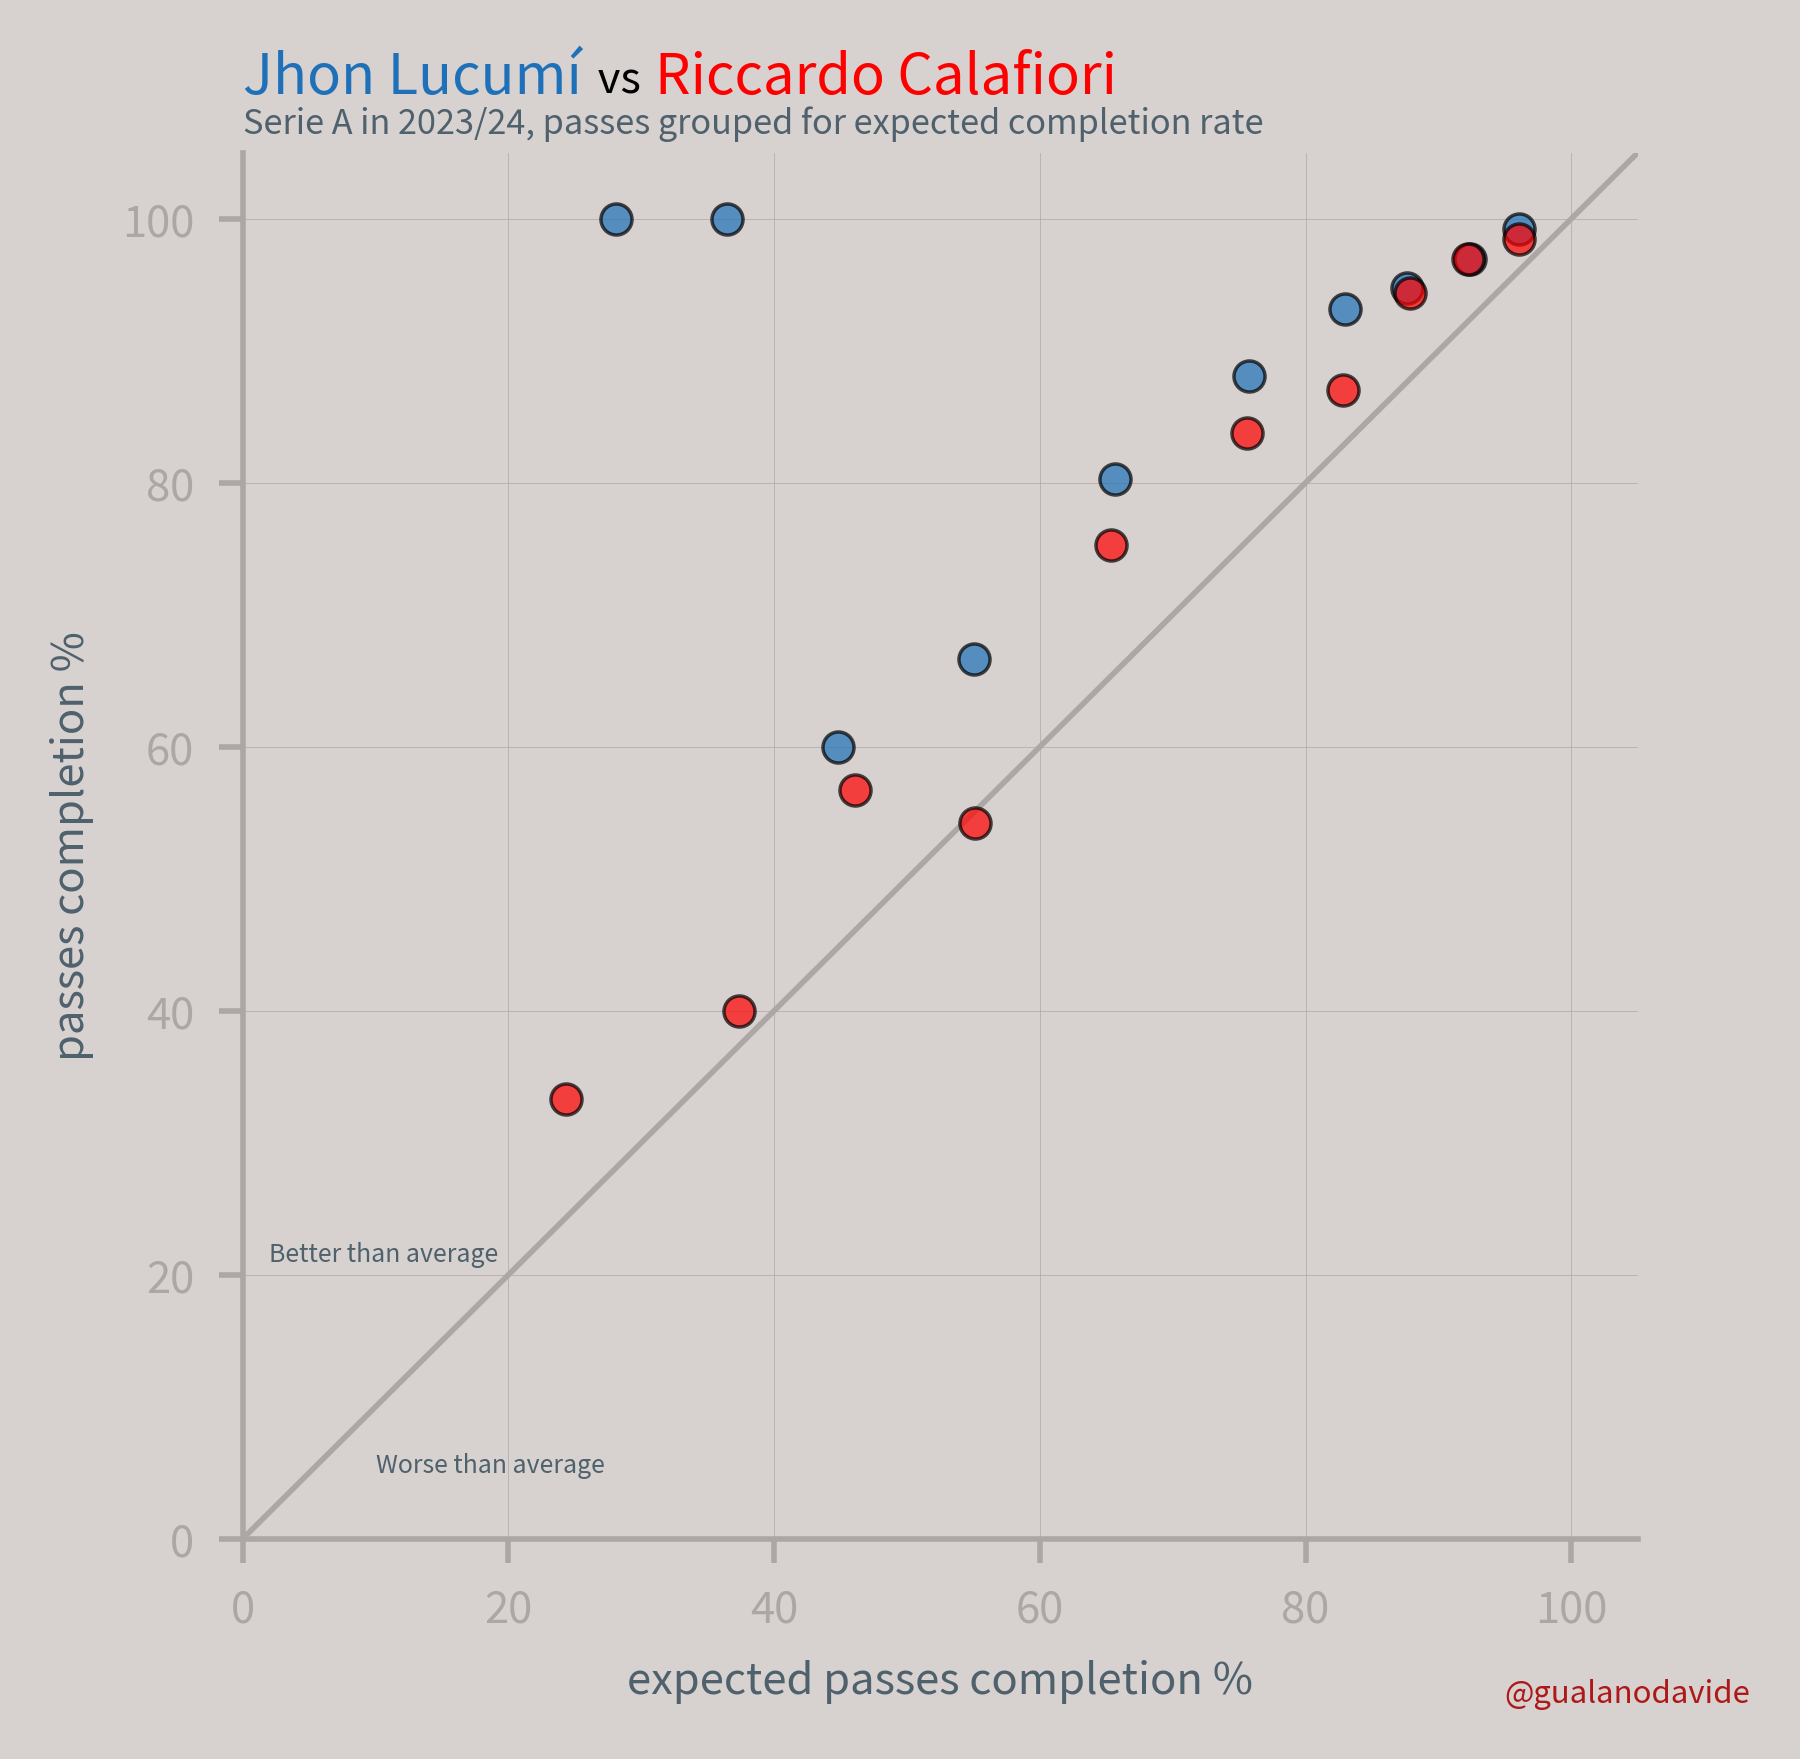

In [109]:
nrows = R2a.shape[0]
for y in range(nrows):
    title1 = R2a['player_name'].iloc[y]
    
nrows = R2b.shape[0]
for y in range(nrows):
    title2 = R2b['player_name'].iloc[y]

fig = plt.figure(figsize=(1800/500, 1800/500), dpi=500, facecolor = '#D7D1CF')
ax = plt.subplot(111, facecolor = '#D7D1CF')

ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)
ax.spines["bottom"].set_color('#ACA7A5')
ax.spines["left"].set_color('#ACA7A5')

ax.grid(lw = 0.1, color = "#ACA7A5", axis = 'x', ls = "-")
ax.grid(lw = 0.1, color = "#ACA7A5", axis = 'y', ls = "-")

# Limit now depends on all of the league's matches
limit_ = math.ceil(max(limX.max(), limY.max()))

ax.set_ylim(0, 105)
ax.set_xlim(0, 105)

ax.scatter(
    X1, 
    Y1, 
    zorder = 3, 
    s = 20, 
    fc = '#1E71B8', # The background color
    ec = "#000000", # The edge color
    alpha = 0.70, # Transparency (from zero to 1)
    lw = 0.5)

ax.scatter(
    X2, 
    Y2, 
    zorder = 3, 
    s = 20, 
    fc = 'red', # The background color
    ec = "#000000", # The edge color
    alpha = 0.70, # Transparency (from zero to 1)
    lw = 0.5)

# We set the major tick positions every integer.
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Notice the consistency in font size between the legend & ticks.
ax.tick_params(axis = 'both', labelsize = 7, color = '#ACA7A5', labelcolor = '#ACA7A5')

# Add axes legends
ax.yaxis.set_label_text("passes completion %", size = 7, color = "#4E616C")
ax.xaxis.set_label_text("expected passes completion %", size = 7, color = "#4E616C")

plt.annotate('Twitter : @gualanodavide | Bluesky : @gualanodavide.bsky.social',
             (0.9,-0.1),
             xycoords='axes fraction',
             textcoords='offset points',
             color = "#AD1919",
             va='top', 
             size = 5)

ax.plot([105, 0], [105, 0], ls="-", lw=0.8, color = '#ACA7A5')

ax.text(
    x = 10, y = 5,
    s = "Worse than average",
    color = "#4E616C",
    size = 4)
ax.text(
    x = 2, y = 21,
    s = "Better than average",
    color = "#4E616C",
    size = 4)

ax.text(
    x=0, y=109.5,
    s=f"{title1}",
    color="#1E71B8",
    size=9,
    ha='left'
)
ax.text(
    x=26, y=109.5,  # Adjust x position as needed
    s=" vs ",
    color="#000000",
    size=7,
    ha='left'
)
ax.text(
    x=31, y=109.5,  # Adjust x position as needed
    s=f"{title2}",
    color="red",
    size=9,
    ha='left'
)
title_ = ax.text(
    x = 0, y = 106.5,
    s = "Serie A in 2023/24, passes grouped for expected completion rate",
    color = "#4E616C",
    size = 5.5)

plt.savefig(f"Passing-Performance-VS.png", dpi=500, bbox_inches = "tight")